In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Скачиваем данные

In [5]:
df = pd.read_csv('./german_credit_data_train.csv')
df_test = pd.read_csv('./german_credit_data_test.csv')

FileNotFoundError: File b'./german_credit_data_train.csv' does not exist

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,43,male,2,rent,little,little,2625,16,car,Unknown
1,44,male,2,own,NaN,NaN,3485,20,car,Unknown
2,42,male,2,free,NaN,NaN,10477,36,car,Unknown
3,40,male,2,rent,NaN,NaN,1386,15,radio/TV,Unknown
4,36,male,3,own,little,NaN,1278,24,radio/TV,Unknown


# Краткий анализ имеющихся данных

###### Баланс классов

In [6]:
df['Risk'].value_counts(normalize=True)

good    0.702222
bad     0.297778
Name: Risk, dtype: float64

###### Проверка пропусков

In [7]:
pd.isnull(df).sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     163
Checking account    356
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

###### Проверка типов данных

In [8]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

###### Проверка количества уникальных

In [9]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       837
Duration             33
Purpose               8
Risk                  2
dtype: int64

###### Просмотр некоторых зависимостей

In [10]:
df['Housing'].value_counts(normalize=True)

own     0.712222
rent    0.175556
free    0.112222
Name: Housing, dtype: float64

###### Выбор категориальных и количественных признаков

In [11]:
num = ['Age', 'Credit amount', 'Duration']
cat = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target = 'Risk'

# Предобработка данных

###### Перевод таргета в классическую форму

In [12]:
df[target] = df[target].map({'good': 0, 'bad': 1})

###### Заполнение пропусков

In [13]:
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')

df_test['Saving accounts'] = df_test['Saving accounts'].fillna('Unknown')
df_test['Checking account'] = df_test['Checking account'].fillna('Unknown')

###### Проверка заполнения пропусков

In [14]:
pd.isnull(df).sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

###### Кодирование Категориальных признаков

In [15]:
df_full = pd.concat([df, df_test])

In [16]:
df_full = pd.get_dummies(data=df_full, columns=cat)

In [17]:
df = df_full.iloc[:-100]
df_test = df_full.iloc[-100:]

In [18]:
df.Risk = df.Risk.astype(int)

###### Выбираем признаки для обучения

In [19]:
train_cols = df.columns.difference([target])

In [20]:
train_cols

Index(['Age', 'Checking account_Unknown', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich', 'Credit amount',
       'Duration', 'Housing_free', 'Housing_own', 'Housing_rent', 'Job_0',
       'Job_1', 'Job_2', 'Job_3', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_Unknown',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich', 'Sex_female',
       'Sex_male'],
      dtype='object')

# Генерация признаков

###### Полиномиальные признаки

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pf = PolynomialFeatures(degree=2)

In [23]:
# df = pf.fit_transform(df)

###### Полет фантазий

In [24]:
df['feature_1'] = ... # Какая-то новая фича, которая повысит качество модели
df['feature_2'] = ... # Какая-то новая фича, которая повысит качество модели
...
df['feature_n'] = ... # Какая-то новая фича, которая повысит качество модели

# Выбор модели и оптимизация

###### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [22]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [23]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [24]:
GS_dtc.fit(X=df[train_cols], y=df[target])

/Users/user/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
GS_dtc.best_score_

0.6777004743729186

###### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [28]:
GS_LR.fit(X=df[train_cols], y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [29]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 0.3764935806792464}

In [30]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

0.7555110253950612

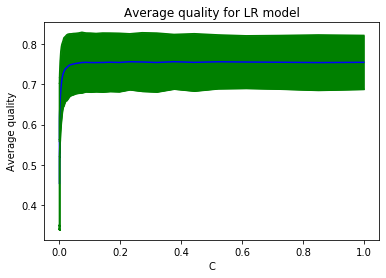

In [31]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

###### kNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [34]:
GS_kNN.fit(df[train_cols], df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [35]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 4}

In [36]:
# Лучший показатель ROC_AUC
GS_kNN.best_score_

0.5847846794744648

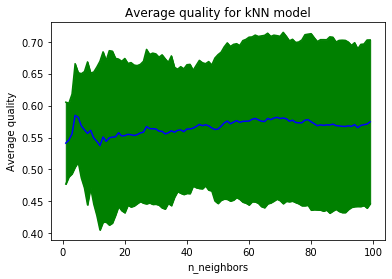

In [37]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Нормировка данных

Нормируем данные и проверяем качество

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss = StandardScaler(with_mean=True, with_std=True)

In [40]:
X_scaled = ss.fit_transform(df[train_cols])

In [41]:
X_test_scaled = ss.transform(df_test[train_cols])

# Модели на нормированных данных

###### Decision Tree Classifier

In [42]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [43]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [44]:
# Заменяем df[train_cols] на X_scaled
GS_dtc.fit(X=X_scaled, y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [45]:
# Алгоритмы на деревьях не чуствительны к масштабированию данных, поэтому скор не изменился
GS_dtc.best_score_

0.649816745696795

Скор не большой, так как мы перебрали не все параметры

Попробуйте факультативно попробовать поварьировать другие параметры и добиться лучшего ROC_AUC

###### Logistic Regression

In [46]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [47]:
GS_LR.fit(X=X_scaled, y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [48]:
# Лучший параметр "C" сильно уменьшился,
# Так как мы нормировали данные и теперь надо меньше штрафовать большие веса
GS_LR.best_params_

{'C': 0.0014849682622544635}

In [49]:
GS_LR.best_score_

0.7514588541561584

###### kNN

In [50]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [51]:
GS_kNN.fit(X_scaled, df[target])

/Users/user/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [52]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 80}

In [53]:
# Показатель метрики ROC_AUC сильно увеличился после нормировки (с 0.59 до 0.75),
# Так как метрические алгоритмы очень чуствительны к ненормированным данным.
GS_kNN.best_score_

0.7437414368015318

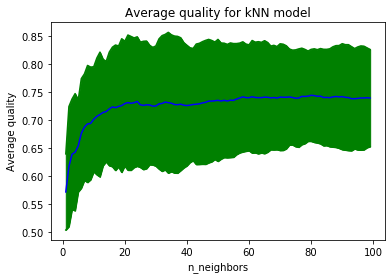

In [54]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Blending

Подробнее про ансамбли хорошо объясняется здесь:

https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [55]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

###### Выбираем наши лучшие модели (модели при лучших параметрах)

In [56]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [57]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [58]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, df[target].values)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=VotingClassifier(estimators=[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=80, p=2,
           weights='uniform')), ('LR', LogisticRegression(C=0.0014849682622544635, class_weight=None, dual=False,
 ...e=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8], [0.30000000000000004, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6000000000000001, 0.3999999999999999], [0.7000000000000001, 0.29999999999999993], [0.8, 0.19999999999999996], [0.9, 0.09999999999999998], [1.0, 0.0]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
grid.best_params_

{'weights': [0.2, 0.8]}

In [60]:
# Лучший показатель ROC_AUC
grid.best_score_

0.7564837693681021

In [61]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля kNN и LogReg =", grid.best_score_)

Качество алгоритма kNN = 0.7437414368015318
Качество алгоритма LogReg = 0.7514588541561584
Качество алгоритма ансамбля kNN и LogReg = 0.7564837693681021


Стало лучше)

### Делаем предсказания на тесте

In [62]:
model = grid.best_estimator_

In [64]:
model.fit(X_scaled, df['Risk'])

VotingClassifier(estimators=[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=80, p=2,
           weights='uniform')), ('LR', LogisticRegression(C=0.0014849682622544635, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[0.2, 0.8])

In [67]:
preds = model.predict_proba(X_test_scaled)[:, 1]

### Готовим предсказания на отправку

In [79]:
df_test['Risk'] = preds

In [81]:
df_test = df_test[['Risk']]

In [83]:
df_test.to_csv('./submition.csv')

### Посмотрим финальный score

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
answers = pd.read_csv('./answers.csv', index_col=0)

In [76]:
answers.Risk = answers.Risk.map({'good': 0, 'bad': 1})

In [78]:
roc_auc_score(y_true=answers.Risk.values, y_score=preds)

0.7679227941176471

_____

_____

_____

_____

_____

_____

_____